## Imports

In [109]:
# To retrieve requirements to run this notebook, run: !pip freexe > requirements.txt, for a user to install the requirements, run: !pip install -r requirements.txt

# Data extraction / numerical operations
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

# Machine learning
import sklearn as sk
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

# Data extraction

In [31]:
# California housing data 
housing_df = fetch_california_housing(as_frame=True).frame

# Data set description
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [32]:
# Examining the first/last few rows of the data set
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [33]:
# Input features and Target variable
print(f'Features: {fetch_california_housing().feature_names}')
print(f'Target: {fetch_california_housing().target_names}')

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: ['MedHouseVal']


In [34]:
# Structure of the data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# EDA

In [35]:
# Numerical features to perform EDA on as Lat/Lon are geographical coordinates
numerical_features = housing_df.drop(['Latitude', 'Longitude'],axis=1)

# Summary statistics of numerical features
numerical_features.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010


- Based on the summary statistics it is clear to see that there is a great disparity between the 75th quartile of the features and the maximum value this infers there is potential outliers within the data set which need to be investigated further or handled before performing any machine learning. This is further supported by the standard deviations for individual features suggesting inconsistency in  values, this is expected due to the variety in housing within the blocks of california. 

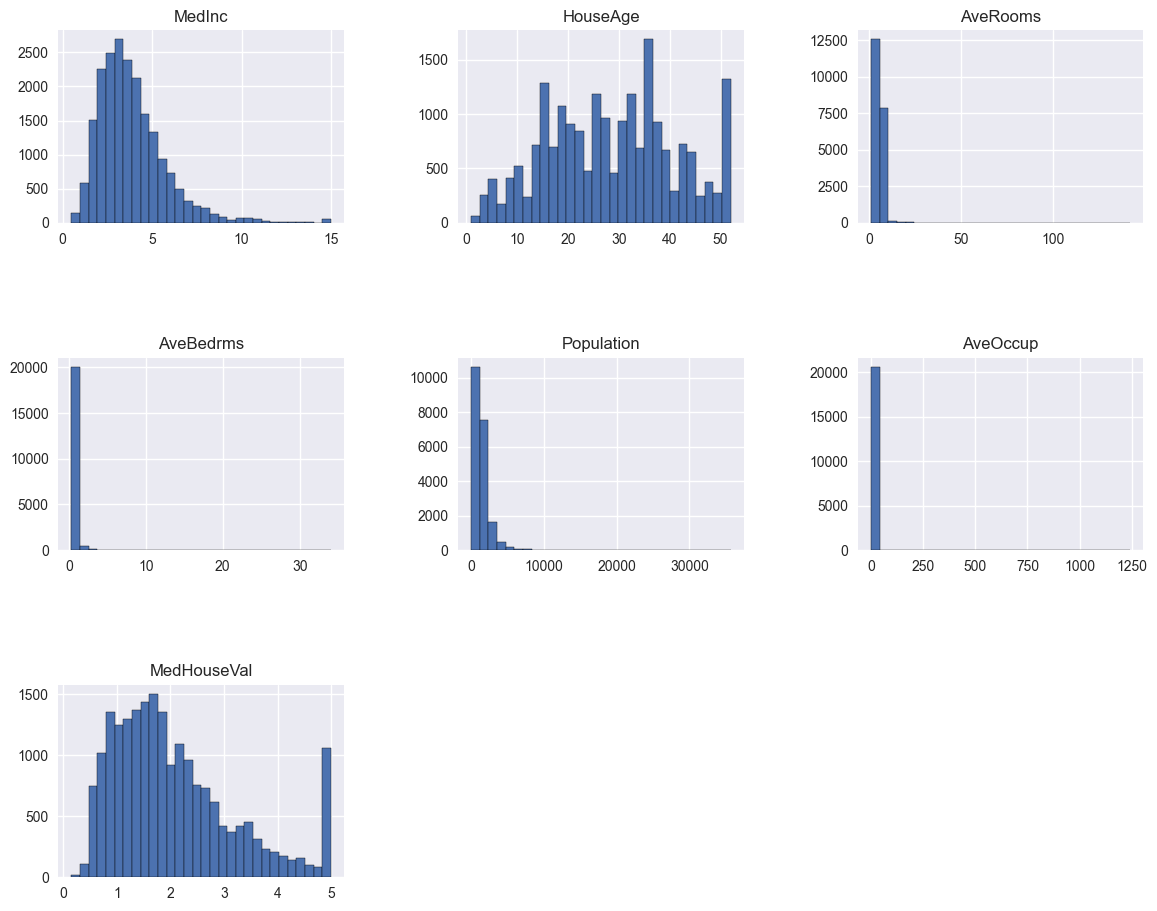

In [36]:
# Numerical Feature distributions
numerical_features.hist(figsize=(14, 11),
                         bins=30,
                           edgecolor="black")

# Subplots adjustment
plt.subplots_adjust(hspace=0.7,
                     wspace=0.4)

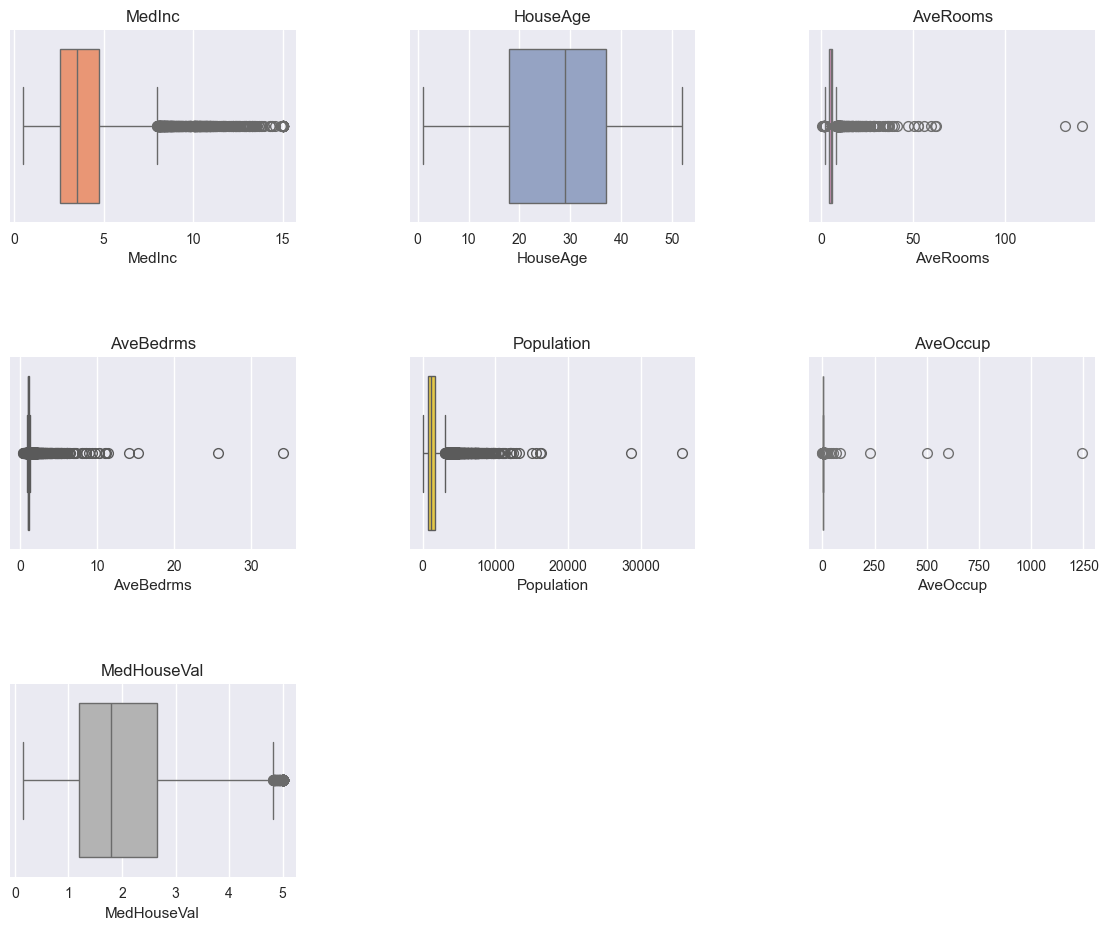

In [37]:
# palette colour for the box plots
palette = sns.color_palette("Set2")

# Box plots for Numerical features to see outliers and distribution better
plt.figure(figsize=(14, 11))

# Loop through the numerical features using enumerate to get the index and column name
for i, col in enumerate(numerical_features.columns, 1):
    
    # Create subplots for 3x3 grid
    plt.subplot(3, 3, i)
    
    # Create boxplot for each numerical feature
    sns.boxplot(x=numerical_features[col],
                 color=palette[i])

    # Set title for each boxplot
    plt.title(col)

# Subplots adjustment and displayment of boxplots
plt.subplots_adjust(hspace=0.7,
                     wspace=0.4)
plt.show()

- In addition to the summary statistics, the distributions of most features exhibit a positive skew, indicating that extreme values are influencing the distribution. Specifically, high values are driving up the average of the feature. These extreme values are visible as outliers beyond the whiskers of the box plots. It's essential to handle these outliers appropiately before performing machine learning as this can heavily impact the performance and accuracy of an ML model when making predictions about the house prices in California.

<Axes: >

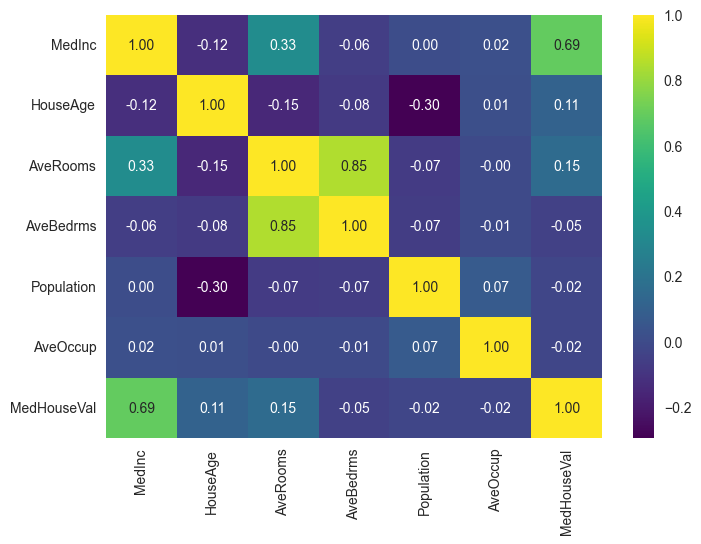

In [38]:
# Heatmap and Correlation matrix of numerical features
sns.heatmap(numerical_features.corr(),
             annot=True,
               cmap = 'viridis',
                 fmt='.2f')

- The key correlations to consider are those features that show a correlation with the median house value in California. Looking at the correlation matrix, it's evident that there's only one feature strongly correlated with the median house value: Median income. The high positive correlation coefficient suggests that as the median income in an area increases, so does the house value in that area, which is intuitive.

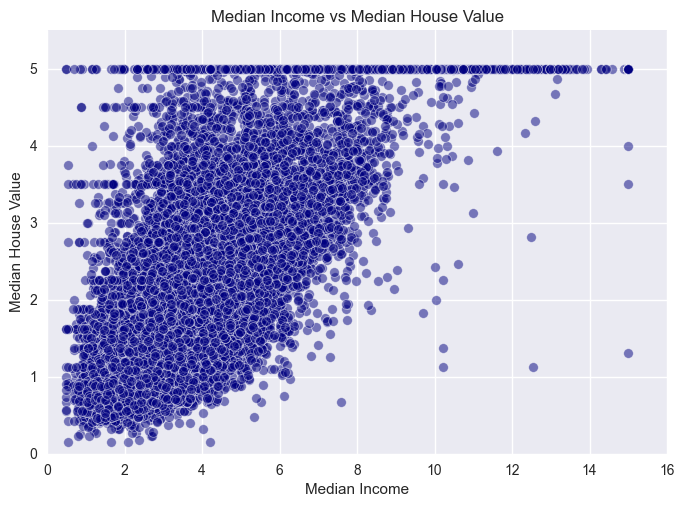

In [39]:
# Scatter plot of Median Income vs Median House Value (Strong positive correlation)
sns.scatterplot(x='MedInc',
                 y='MedHouseVal',
                   data=housing_df,
                     alpha=0.5,
                     color='navy')

# Visual adjustments, for x and y axis limits, labels and title
plt.xlim(0, 16)
plt.ylim(0, 5.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs Median House Value')
plt.show()

- From the scatter plot of median income and median house value, it seems as if all house values that were to be above 5 have been replaced and capped at 5. It is also evident that there is a few outliers which can potentially affect the accuracy of our predictions if not handled.

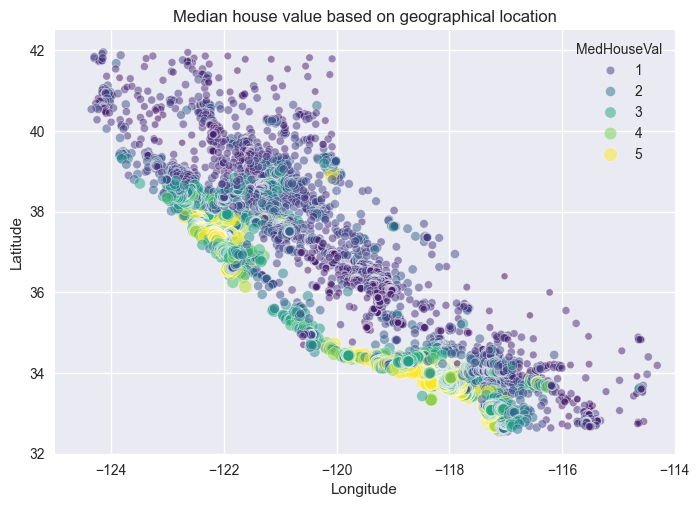

In [40]:
# Scatter plot of Median House Value based on geographical location
sns.scatterplot(data = housing_df,
                 x = "Longitude",
                   y = "Latitude",
                     size = "MedHouseVal",
                       hue = "MedHouseVal",
                         palette = "viridis",
                           alpha=0.5)

# Visual adjustments, for x and y axis limits, labels, legend and title
plt.ylim(32, 42.5)
plt.xlim(-125, -114)
plt.legend(title = "MedHouseVal")
plt.title("Median house value based on geographical location")
plt.show()

- This graph displays the geographical coordinates of the areas within the california state. It can be idnetified that the houses which possess the higher median value are typically at the coast of the state with the lower value houses in the centre of the state. There is distinct clusters here suggesting the location can provide an estimation for what the typical house value may be.

# Data Preprocessing

In [41]:
# Features that outlier handling will be performed on, we don't want to remove outliers from the target variable
outlier_removal_feats = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [42]:
# List to store Outliers based on the IQR method
outliers = []

# Function to identify data points above and below the upper and lower bounds
def outlier_identification(feature_name):

    """
    This function identifies outliers for a given feature using the IQR method.
    
    Parameters:
        feature_name (str): Name of the feature for which outliers are to be identified.
        
    Returns:
        outliers_upper (pandas.Series): Boolean array indicating elements above the upper bound.
        outliers_lower (pandas.Series): Boolean array indicating elements below the lower bound.
    """
    
    # Upper and Lower Quartile (Q3 and Q1)
    lq = housing_df[feature_name].quantile(0.25)
    uq = housing_df[feature_name].quantile(0.75)

    # IQR (Interquartile Range)
    IQR = uq - lq

    # Outliers that lie above the upper bound
    outliers_upper = housing_df[feature_name] >= (uq + 1.5 * IQR)

    # Outliers that lie below the lower bound
    outliers_lower = housing_df[feature_name] <= (lq - 1.5 * IQR)

    return outliers_upper, outliers_lower

In [43]:
# Iterating through each feature in the outlier_removal_feats list
for feature in outlier_removal_feats:

    # Outliers above and below the IQR based on each feature
    outliers_upper, outliers_lower = outlier_identification(feature)
    
    # Appending the outliers to the list
    outliers.append(outliers_upper | outliers_lower)

# outliers list     
print('Boolean list of outliers:', outliers)

Boolean list of outliers: [0         True
1         True
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: MedInc, Length: 20640, dtype: bool, 0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: HouseAge, Length: 20640, dtype: bool, 0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: AveRooms, Length: 20640, dtype: bool, 0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636     True
20637    False
20638    False
20639    False
Name: AveBedrms, Length: 20640, dtype: bool, 0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
206

In [44]:
# Any outliers which are below or above the IQR method for each feature, those that returned True in the outliers list
Outliers_to_remove = np.any(outliers, axis = 0)
     
# Index of the outliers
index_outliers = np.where(Outliers_to_remove)
     
# total number of outliers
print('Number of outliers within the california housing df:',len(index_outliers[0]))

Number of outliers within the california housing df: 3800


In [45]:
# Cleaned data without outliers
housing_cleaned_df = housing_df.drop(index_outliers[0], axis=0)

# cleaned data set
housing_cleaned_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
...,...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


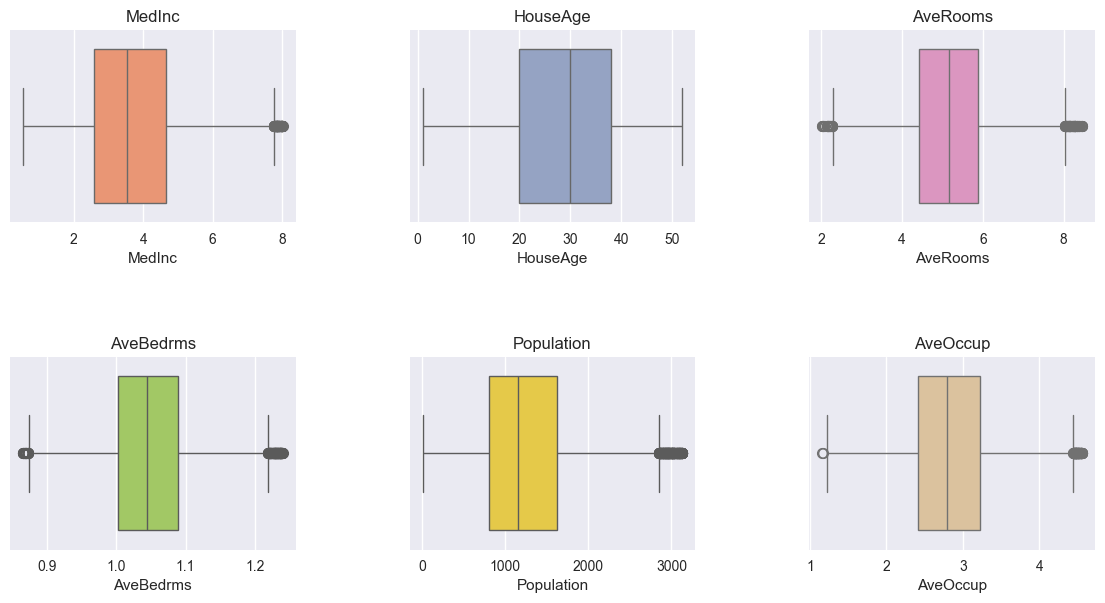

In [46]:
# palette colour for the box plots
palette = sns.color_palette("Set2")

# Cleaned features to visualise after IQR method
cleaned_numerical_features = housing_cleaned_df.drop(['Latitude', 'Longitude', 'MedHouseVal'],axis=1)

# Box plots for cleaned features
plt.figure(figsize=(14, 11))

# Loop through the numerical features using enumerate to get the index and column name
for i, col in enumerate(cleaned_numerical_features, 1):
    
    # Create subplots for 3x3 grid
    plt.subplot(3, 3, i)
    
    # Create boxplot for each cleaned numerical feature
    sns.boxplot(x=cleaned_numerical_features[col],
                 color=palette[i])

    # Set title for each boxplot
    plt.title(col)

# Subplots adjustment and displayment of boxplots
plt.subplots_adjust(hspace=0.7,wspace=0.4)
plt.show()

- Now the data has been pre-processed and the outliers have been handled appropiately, we can now employ Supervised Machine learning techniques to try and predict the Median house value in california based on the features within the data set. We can also compare the difference in model performance between the impact of outliers and the impact without to see if the pre-processing has bettered the models ability to predict housing prices.

# Machine Learning (ML)

## Supervised ML (Random Forest Regressor)

In [110]:
# input and target variables
X = housing_cleaned_df.drop('MedHouseVal', axis=1)
y = housing_cleaned_df['MedHouseVal']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [111]:
def random_forest_regression(X_train,X_test,y_train, y_test, number_of_estimators, max_tree_depth, max_number_of_features):
    """
    This function perfrorms Random Forest Regression on the given data set.

    Parameters:
        X_train (pandas.DataFrame): Training data set.
        X_test (pandas.DataFrame): Testing data set.
        y_train (pandas.Series): Training target variable.
        y_test (pandas.Series): Testing target variable.
        number_of_estimators (int): Number of trees in the forest.
        max_tree_depth (int): Maximum depth of the tree.
        max_number_of_features (int): Maximum number of features to consider when looking for the best split.

    Evaluation Metrics:
        R2 Score: Coefficient of determination.
        RMSE: Root Mean Squared Error.

    Returns:
        r2 (float): R2 Score.
        rmse (float): Root Mean Squared Error.
        rfr (RandomForestRegressor): Random Forest Regressor model trained on the data set.
    
    """

    # Random Forest Regressor
    rfr = RandomForestRegressor(n_estimators=number_of_estimators,
                                max_depth=max_tree_depth,
                                max_features= max_number_of_features,
                                random_state=42)

    # Fitting the model
    rfr.fit(X_train, y_train)

    # Predictions
    y_pred = rfr.predict(X_test)

    # R2 Score
    r2 = r2_score(y_test, y_pred)
    print(f'R2 Score: {r2}')

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'RMSE: {rmse}')

    # Visualize actual vs. predicted values
    plt.scatter(y_test, y_pred, color = 'purple', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='-') 
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values")
    plt.show()


    # Feature Importance Plot
    feature_importance = rfr.feature_importances_
    plt.figure(figsize=(10, 6))
    plt.barh(X_train.columns, feature_importance)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance Plot')
    plt.show()

    return r2, rmse, rfr


## Supervised ML models (Experimentation)

### Model 1

R2 Score: 0.44849624530839594
RMSE: 0.7801660044059427


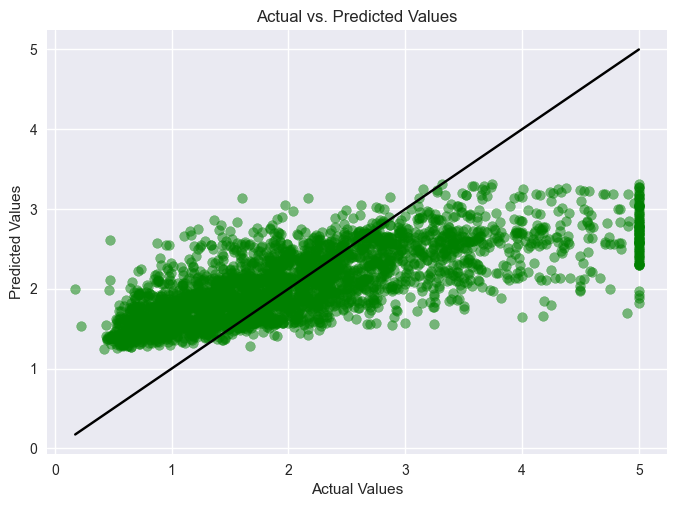

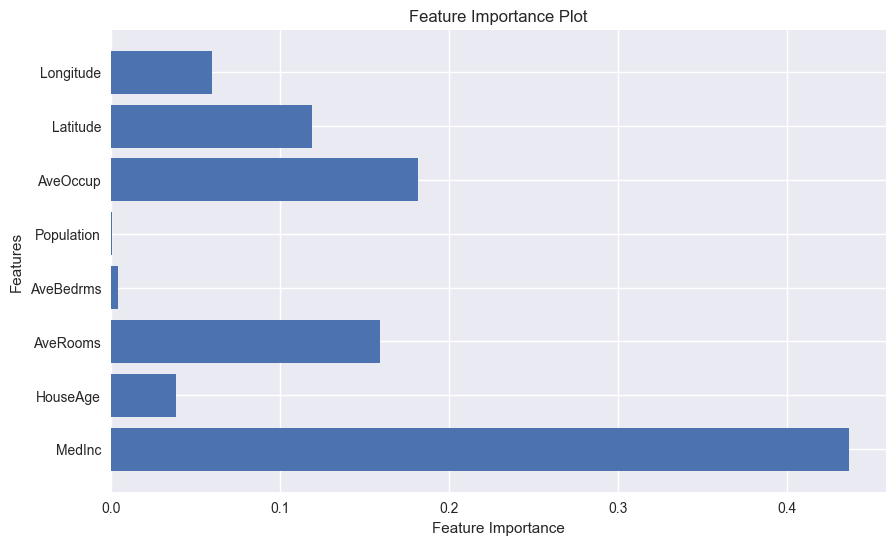

In [112]:
# FIrst iteration of the rfr model storing the performance metrics to plot perfpormance of the model with different hyperparameters
model1_r2, model1_rmse, model1_rfr = random_forest_regression(X_train, X_test,
                                                               y_train, y_test,
                                                                number_of_estimators=50, 
                                                                  max_tree_depth=3,
                                                                    max_number_of_features=2)

In [ ]:
# Visualing one of the trees
plt.figure(figsize=(20, 10))
plot_tree(model1_rfr.estimators_[0], feature_names=fetch_california_housing().feature_names, filled=True)
plt.show()


### Model 2

R2 Score: 0.6828788752245136
RMSE: 0.5915961948096757


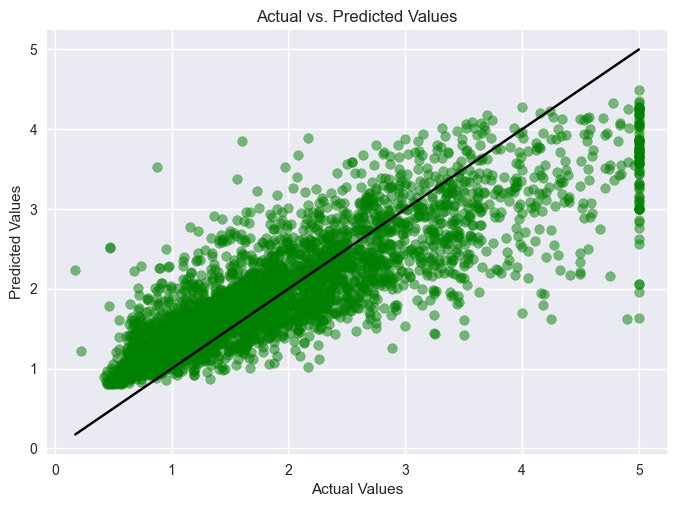

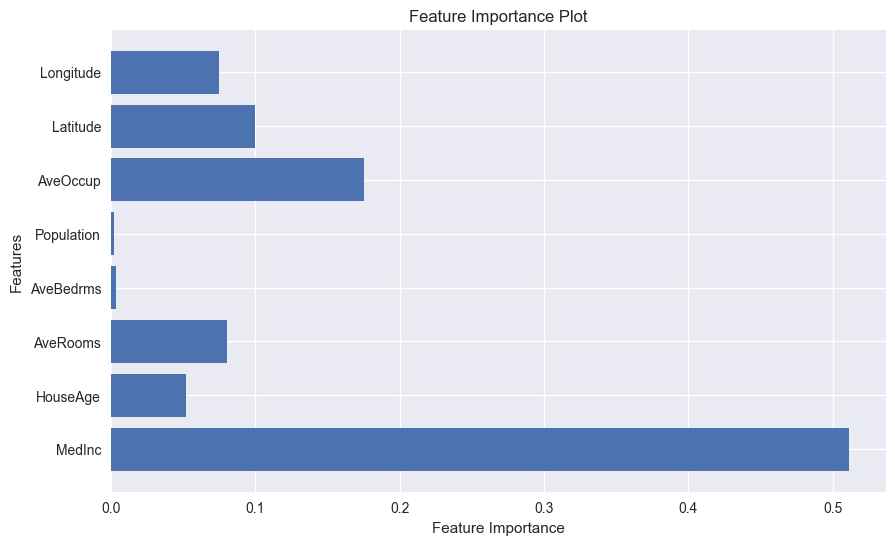

In [113]:
# Iteration 2 of the model, gradual increase in tree depth and number of estimators, and max number of features
model2_r2, model2_rmse, model2_rfr = random_forest_regression(X_train, X_test,
                                                               y_train, y_test,
                                                                number_of_estimators=100, 
                                                                  max_tree_depth=6,
                                                                    max_number_of_features=4)

### Model 3

R2 Score: 0.7603828843440228
RMSE: 0.5142469249230589


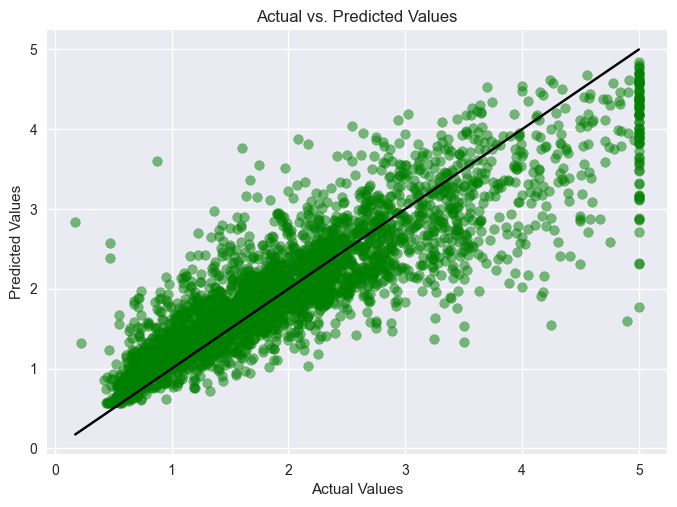

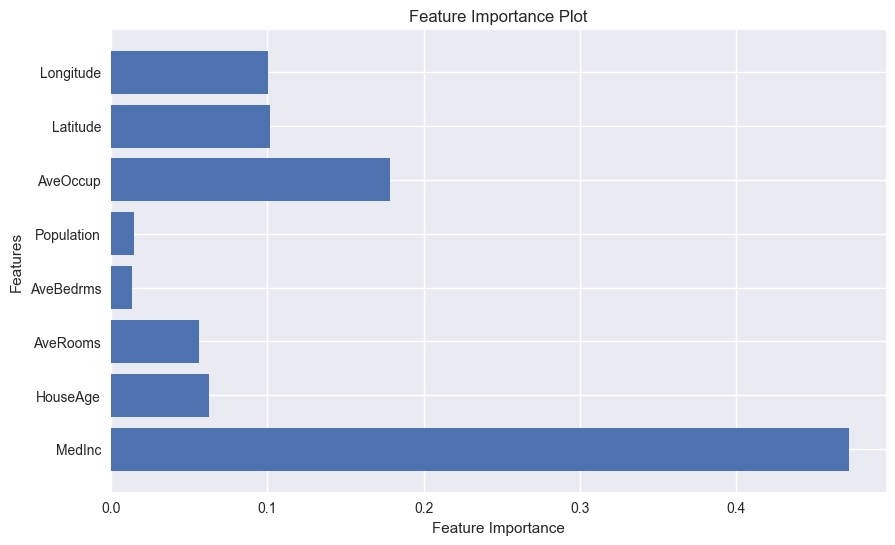

In [114]:
# Iteration 3 of the model, gradual increase in tree depth and number of estimators and max number of features
model3_r2, model3_rmse, model3_rfr = random_forest_regression(X_train, X_test,
                                                               y_train, y_test,
                                                                number_of_estimators=200, 
                                                                  max_tree_depth=9,
                                                                    max_number_of_features=6)

## Hyperparameter tuning

In [118]:
# Grid search to find the best parameters for the model

# Random Forest Regressor
rfr = RandomForestRegressor(random_state=42)

# Parameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [3,6, 9, 12, 15, 18, 21],
    'max_features': [2, 4, 6, 8]
}

# Grid Search
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=3, n_jobs=-1,scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Best parameters and best estimator
print(f'Best Parameters: {best_params}')
print(f'Best Estimator: {best_estimator}')



### Model 4

R2 Score: 0.8040598401871777
RMSE: 0.465023086416364


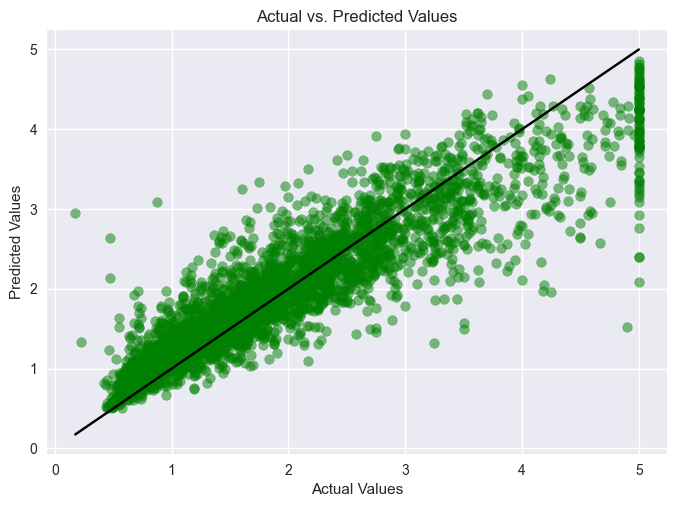

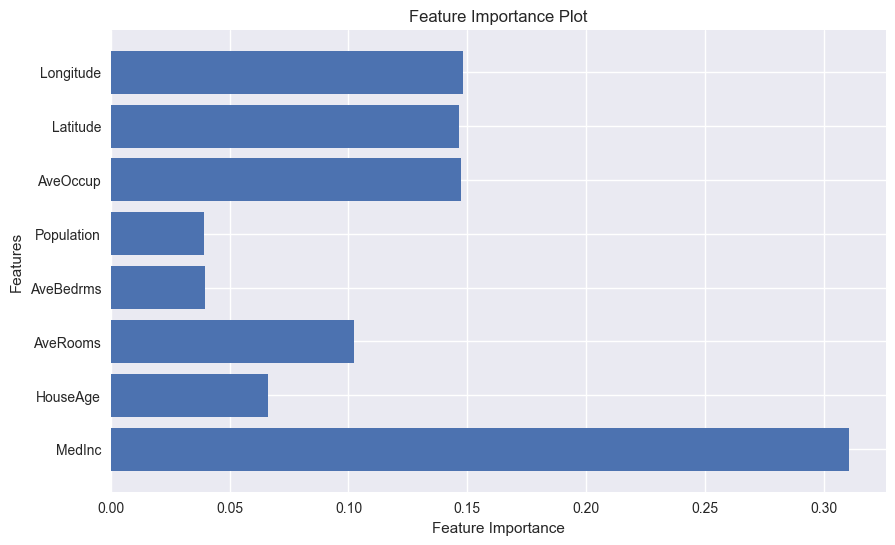

In [117]:
# Iteration 4 of the model, gradual increase in tree depth and number of estimators and max number of features
model4_r2, model4_rmse, model4_rfr = random_forest_regression(X_train, X_test,
                                                               y_train, y_test,
                                                                number_of_estimators=500, 
                                                                  max_tree_depth=21,
                                                                    max_number_of_features=2)
                                  

## Model Evaluation 

### Parameter performance

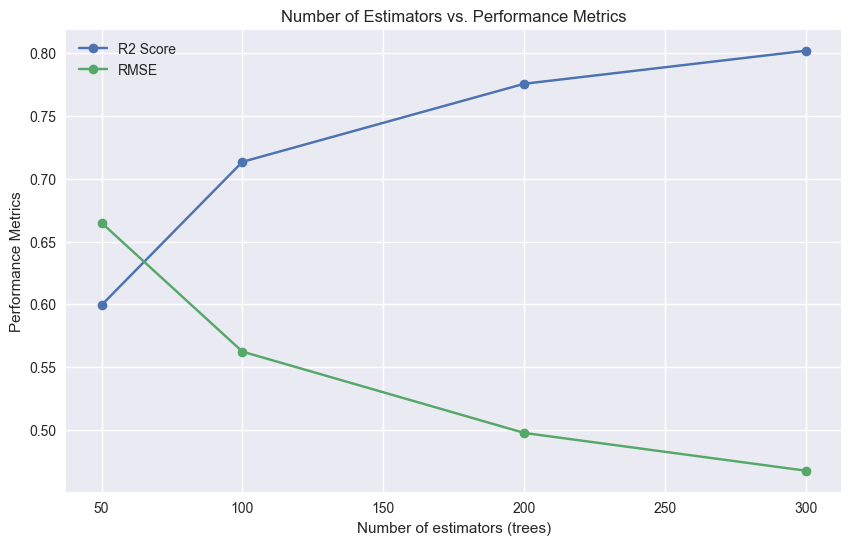

In [55]:
# Storing the performance metrics and the parameters of the models to see how the change in hyperparameters affects the performance of the model
# R2 Score and RMSE scores
r2_scores = [model1_r2, model2_r2, model3_r2, model4_r2]
rmse_scores = [model1_rmse, model2_rmse, model3_rmse, model4_rmse]

# Hyperparameters
n_estimators = [50, 100, 200, 300]
max_depths = [5, 7, 10, 20]
max_features = [2, 4, 8, 10]

# Plotting the change in number of estimators against the performance metrics
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, r2_scores, marker='o', label='R2 Score')
plt.plot(n_estimators, rmse_scores, marker='o', label='RMSE')
plt.xlabel('Number of estimators (trees)')
plt.ylabel('Performance Metrics')
plt.title('Number of Estimators vs. Performance Metrics')
plt.legend()
plt.show()


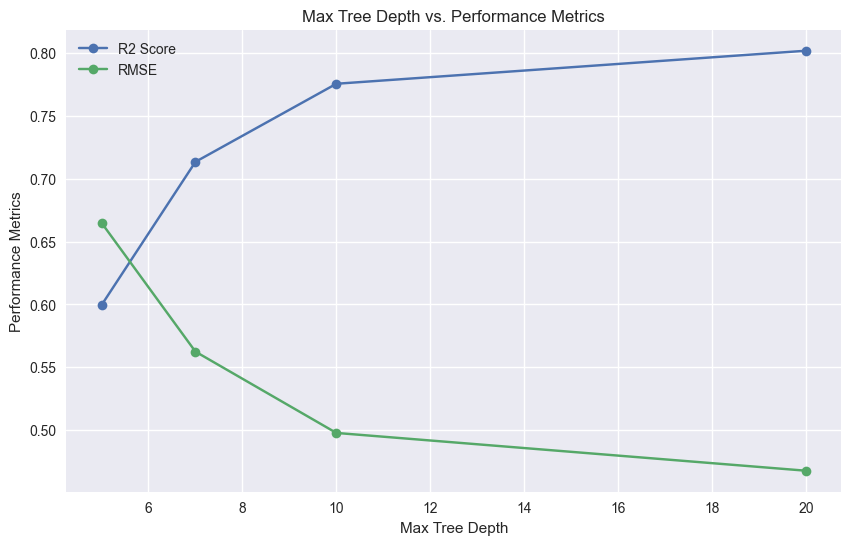

In [56]:
# Plotting the change in max tree depth against the performance metrics
plt.figure(figsize=(10, 6))
plt.plot(max_depths, r2_scores, marker='o', label='R2 Score')
plt.plot(max_depths, rmse_scores, marker='o', label='RMSE')
plt.xlabel('Max Tree Depth')
plt.ylabel('Performance Metrics')
plt.title('Max Tree Depth vs. Performance Metrics')
plt.legend()
plt.show()

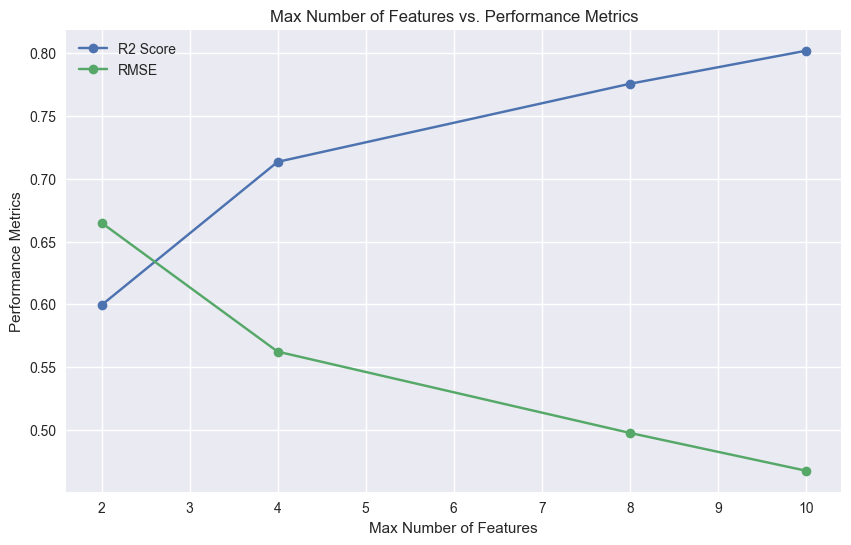

In [57]:
# Plotting the change in max number of features against the performance metrics
plt.figure(figsize=(10, 6))
plt.plot(max_features, r2_scores, marker='o', label='R2 Score')
plt.plot(max_features, rmse_scores, marker='o', label='RMSE')
plt.xlabel('Max Number of Features')
plt.ylabel('Performance Metrics')
plt.title('Max Number of Features vs. Performance Metrics')
plt.legend()
plt.show()

### Learning Curve

In [96]:
def learning_curves(model, train_sizes, cv):
    """
    This function plots the learning curves for a given estimator.

    Parameters:
        model: Machine learning model.
        df (pandas.DataFrame): Data set.
        features (list): List of feature names.
        target (str): Target variable name.
        train_sizes (array): Array of training set sizes.
        cv (int): Number of cross-validation folds.

    Returns:
        train_sizes: Array of training set sizes.
        train_scores: Mean training scores.
        test_scores: Mean validation scores.
    """
    # Learning curve instance of the model, extracting the train sizes and scores for both training and validation to plot the learning curve
    train_sizes, train_scores, test_scores = learning_curve(model,
                                                             housing_cleaned_df.drop('MedHouseVal', axis=1),
                                                               housing_cleaned_df['MedHouseVal'],
                                                                 train_sizes=train_sizes,
                                                                    cv=cv,
                                                                        scoring='neg_mean_squared_error') 

    # Due to the negative mean squared error, we take the negative of the mean scores to get the mse values
    train_scores_mean_mse = -train_scores.mean(axis=1)
    test_scores_mean_mse = -test_scores.mean(axis=1)
    
    # To evaluate performance of the mdoel, we are interested in the RMSE values so the square root is taken
    train_scores_mean_rmse = np.sqrt(train_scores_mean_mse)
    test_scores_mean_rmse = np.sqrt(test_scores_mean_mse)

    # Plotting the learning curve
    plt.plot(train_sizes, train_scores_mean_rmse, label='Training error')
    plt.plot(train_sizes, test_scores_mean_rmse, label='Validation error')
    plt.ylabel('RMSE')
    plt.xlabel('Training set size')
    plt.title('Random forest regression Learning curve')
    plt.legend()
    plt.show()

    return train_sizes, train_scores_mean_rmse, test_scores_mean_rmse

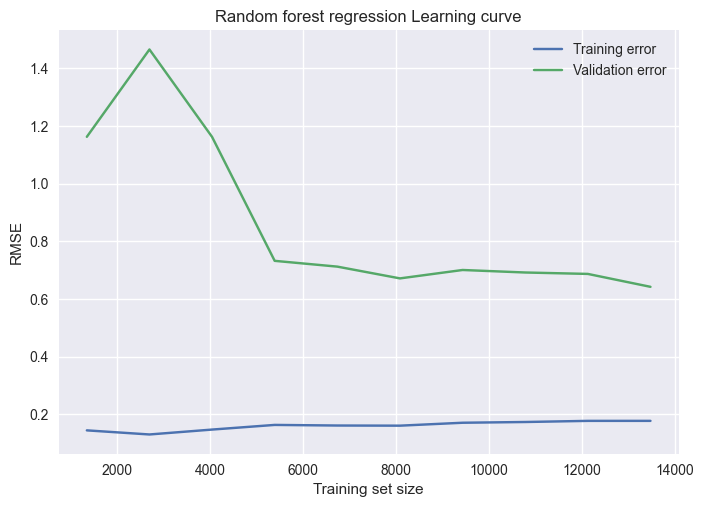

(array([ 1347,  2694,  4041,  5388,  6736,  8083,  9430, 10777, 12124,
        13472]),
 array([0.14439831, 0.13015249, 0.14715628, 0.16330436, 0.16119837,
        0.16069599, 0.17083071, 0.17341092, 0.17733497, 0.1773654 ]),
 array([1.16271027, 1.4657151 , 1.16240459, 0.73247321, 0.71240154,
        0.67158101, 0.70073337, 0.6920343 , 0.68711608, 0.64233619]))

In [97]:
# Plotting the learning curve for the Random Forest Regressor model
learning_curves(model=model4_rfr,
                train_sizes=np.linspace(0.1, 1.0, 10),
                cv=5)

## Unsupervised ML (K Means Clustering)
